In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fullwidth.mplstyle')
cmap = matplotlib.colormaps.get('tab10').colors


Bad key errorbar.capthick in file fullwidth.mplstyle, line 38 ('errorbar.capthick: 1.2')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


In [2]:
import os
from tqdm import tqdm
from corrections import *


#### Plot showing how an unnormalised G2 function looks

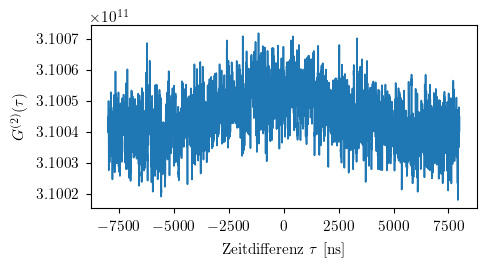

In [3]:
data = np.load('D:/20240711_10x10/measurement_00100.npy')
fig,ax = plt.subplots()
ax.plot(np.arange(-8000,8000,1.6), data)
ax.set(xlabel='Zeitdifferenz $\\tau$ [ns]', ylabel='$G^{(2)}(\\tau)$')
ax.ticklabel_format(useOffset=False)
fig.tight_layout()
# fig.savefig('latex/images/Datenaufnahme/G2.pdf', bbox_inches='tight')

#### Plots showing influence of averaging, pattern correction and lowpass

In [4]:
directory = 'D:/20240711_10x10'
file_path_list = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
sum = np.zeros(10000)
weight_sum = 0
for path in tqdm(file_path_list, desc='Do data reduction'): 
    data = np.load(path) 
    weight = np.std(data)**-2
    sum += data*weight
    weight_sum += weight
average_g2 = sum/weight_sum
np.savetxt('reduced_data/intro_plots/only_av.txt', average_g2)
sum = np.zeros(10000)
weight_sum = 0
for path in tqdm(file_path_list, desc='Do data reduction'): 
    data = np.load(path) 
    data = pattern_correction(data)
    weight = np.std(data)**-2
    sum += data*weight
    weight_sum += weight
average_g2 = sum/weight_sum
np.savetxt('reduced_data/intro_plots/av_and_pc.txt', average_g2)
np.savetxt('reduced_data/intro_plots/the_works.txt', lowpass(average_g2))

KeyboardInterrupt: 

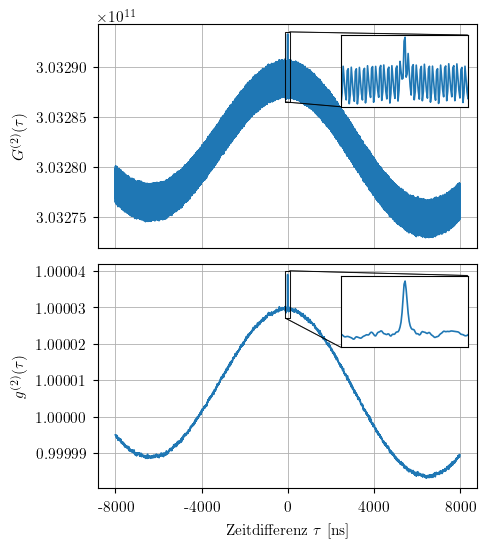

In [5]:
t = np.arange(-8000,8000,1.6)
g2 = np.loadtxt('reduced_data/intro_plots/only_av.txt')
fig, ax = plt.subplots(nrows=2, figsize=(5,2.81*2))
ax[0].plot(t,g2, color=cmap[0])
ax[0].set(ylabel='$G^{(2)}(\\tau)$')
ax[0].set(xticks=[-8000,-4000,0,4000,8000], xticklabels=[])
ax[0].tick_params(axis='x', which='both', length=0)
ax[0].grid()
ax0in = ax[0].inset_axes([0.64,0.63, 0.335,0.32],xlim=(-100,100), ylim=(3.032865e11,3.032935e11), xticklabels=[], yticklabels=[], xticks=[], yticks=[])
# necessary style stuff
ax[0].indicate_inset_zoom(ax0in, edgecolor='k')
ax0in.spines[['top','right','bottom','left']].set_color('k')
box, cs = ax[0].indicate_inset_zoom(ax0in)
box.set_linewidth(0.6)
box.set_edgecolor("k")
box.set_facecolor("none")
box.set_alpha(1)
for c in cs:
    c.set_linewidth(0.6)
    c.set_color("k") 
    c.set_alpha(1)
# ----------------------
ax0in.plot(t[(t>-300)&(t<300)],g2[(t>-300)&(t<300)], color=cmap[0])
ax[1].grid()
g2 = np.loadtxt('reduced_data/intro_plots/the_works.txt')
ax[1].plot(t,g2, color=cmap[0])
ax[1].set(xlabel='Zeitdifferenz $\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xticks=[-8000,-4000,0,4000,8000], xticklabels=[-8000,-4000,0,4000,8000])
ax1in = ax[1].inset_axes([0.64,0.63, 0.335,0.32],xlim=(-100,100), ylim=(1.000027,1.00004), xticklabels=[], yticklabels=[], xticks=[], yticks=[])
# necessary style stuff (again)
ax[1].indicate_inset_zoom(ax1in, edgecolor='k')
ax1in.spines[['top','right','bottom','left']].set_color('k')
box, cs = ax[1].indicate_inset_zoom(ax1in)
box.set_linewidth(0.6)
box.set_edgecolor("k")
box.set_facecolor("none")
box.set_alpha(1)
for c in cs:
    c.set_linewidth(0.6)
    c.set_color("k") 
    c.set_alpha(1)
# ----------------------
ax1in.plot(t[(t>-300)&(t<300)],g2[(t>-300)&(t<300)], color=cmap[0])
for axis in ax:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))
fig.tight_layout()
fig.savefig('latex/images/Datenaufnahme/G2_vs_g2.pdf', bbox_inches='tight')

#### Plots for comparison of differnt waveforms

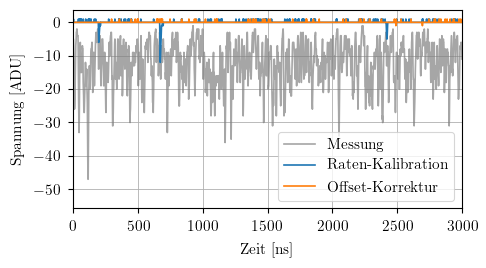

In [6]:
meas = np.load('D:/waveform.npy')
calib = np.load('D:/calib.npy')
off = np.load('D:/off.npy')
fig,ax = plt.subplots()
ax.plot(np.arange(0,10000)*1.6, meas, color='grey', label='Messung', alpha=0.7)
ax.plot(np.arange(0,10000)*1.6, calib, color=cmap[0], label='Raten-Kalibration')
ax.plot(np.arange(0,10000)*1.6, off, color=cmap[1], label='Offset-Korrektur')
ax.set(xlabel='Zeit [ns]', ylabel='Spannung [ADU]', xlim=(0,3000))
ax.grid()
ax.legend()
fig.tight_layout()
fig.savefig('latex/images/Datenaufnahme/Kalibration.pdf', bbox_inches='tight')